# Random Agent

We will start by gaining intuition on the task at hand by running a random agent. Create a RandomAgent, which selects actions randomly. Run the agent on the environment until the episode is
either truncated or terminated. **Store the episode and render (visualize) it.**

Now run the agent for 100 episodes. At every episode initialize the environment with a new randomly sampled seed. **Plot the duration of each episode as a scatter plot.** What do you find? Explain.

In [1]:
import os
while os.path.basename(os.getcwd()) != "MountainCar-RL":
    os.chdir('..')

import gymnasium as gym

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

from agents.random_agent import RandomAgent

In [2]:
seed = 42

# Create env
max_episode_steps=200
env = gym.make('MountainCar-v0', render_mode='rgb_array', max_episode_steps=max_episode_steps)

# Create agent
action_space = np.array([0, 1, 2])
agent = RandomAgent(action_space, seed+1)

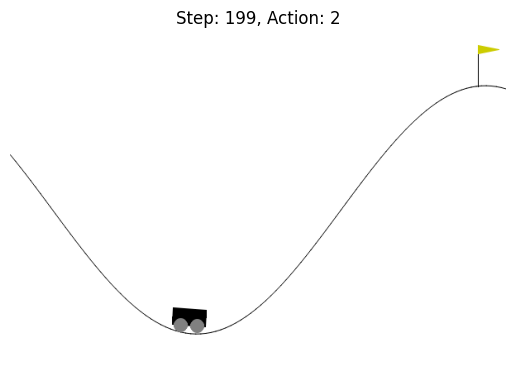

In [3]:
frames = []
actions = []

# Run episode
state, _ = env.reset(seed=101)
done = False
while not done:
    action = agent.select_action(state)
    next_state, reward, terminated, truncated, _ = env.step(action)

    state = next_state
    done = terminated or truncated

    frames.append(env.render())
    actions.append(action)
    
# Replay episode
for i, frame in enumerate(frames):
    clear_output(wait=True)
    plt.imshow(frame)
    plt.title(f"Step: {i}, Action: {actions[i]}")
    plt.axis('off')
    plt.show()

In [4]:
seed = 42

# Create env
max_episode_steps=200
env = gym.make('MountainCar-v0', max_episode_steps=max_episode_steps)

# Create agent
action_space = np.array([0, 1, 2])
agent = RandomAgent(action_space, seed+1)

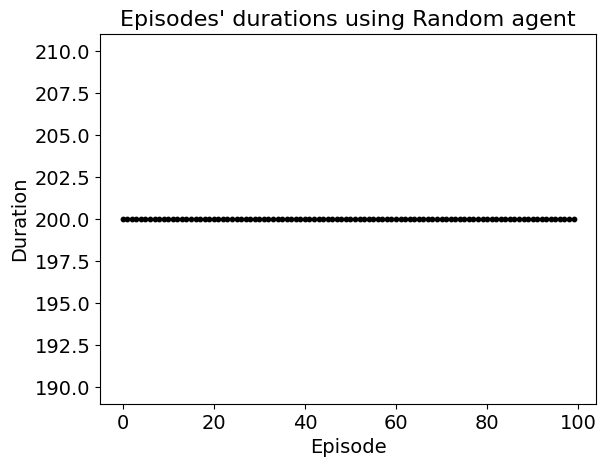

In [8]:
n_episodes = 100

durations = np.zeros(n_episodes, dtype=int)

rng_seed = np.random.default_rng(seed)
for episode in range(n_episodes):
    state, _ = env.reset(seed=rng_seed.integers(2147483647).item())
    done = False
    
    duration = 0
    
    while not done:
        action = agent.select_action(state)
        next_state, reward, terminated, truncated, _ = env.step(action)

        agent.observe(state, action, next_state, reward)
        loss = agent.update()

        duration += 1
        done = terminated or truncated
    
    durations[episode] = duration

#plt.close('all')
#plt.figure(figsize=(8, 6))
plt.scatter(range(n_episodes), durations, s=10, c='black')
plt.ylabel("Duration", fontsize=14)
plt.xlabel("Episode", fontsize=14)
plt.tick_params(axis='both', labelsize=14)
plt.title("Episodes' durations using Random agent", fontsize=16)
plt.savefig("plots/A_Random_duration.pdf", transparent=True, bbox_inches="tight")
plt.show()